# 14 Small, Anisotropic (figures in Supporting Information)

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

mpl.rcParams['font.sans-serif'] = 'Nimbus Sans L'
mpl.rcParams["mathtext.fontset"] = "stix"

In [2]:
for f in mpl.font_manager.findSystemFonts():
    mpl.font_manager.fontManager.addfont(f)

In [3]:
os.makedirs("figures", exist_ok=True)

In [4]:
df_aniso = pd.read_csv("small14-anisotropic.csv", index_col=[0, 1], header=[0])

In [5]:
df_aniso_ref = pd.DataFrame(index=df_aniso.loc["aug-cc-pVDZ"].index, columns=df_aniso.columns)
df_aniso_ref["SCF"] = df_aniso.loc["aug-cc-pCV5Z", "SCF"]
df_aniso_ref[["Corr2", "CorrD", "CorrD(T)"]] = df_aniso.loc["aug-cc-pCV[Q5]Z", ["Corr2", "CorrD", "CorrD(T)"]]
df_aniso_ref["MP2"] = df_aniso_ref["SCF"] + df_aniso_ref["Corr2"]
df_aniso_ref["CCSD"] = df_aniso_ref["MP2"] + df_aniso_ref["CorrD"]
df_aniso_ref["CCSD(T)"] = df_aniso_ref["MP2"] + df_aniso_ref["CorrD(T)"]

In [6]:
# Deviation in percentage
df_aniso_diff = pd.DataFrame(index=df_aniso.index, columns=df_aniso.columns)
for basis in df_aniso.index.levels[0]:
    df_aniso_diff.loc[basis] = 100 * np.asarray((df_aniso.loc[basis] - df_aniso_ref[df_aniso.columns]).div(df_aniso_ref["CCSD(T)"], axis=0))

In [7]:
basis_a = ["aug-cc-pVDZ", "aug-cc-pVTZ", "aug-cc-pVQZ", "aug-cc-pV5Z"]
basis_ac = ["aug-cc-pCVDZ", "aug-cc-pCVTZ", "aug-cc-pCVQZ", "aug-cc-pCV5Z"]
basis_cbs_a = ["aug-cc-pV[DT]Z", "aug-cc-pV[TQ]Z", "aug-cc-pV[Q5]Z"]
basis_cbs_ac = ["aug-cc-pCV[DT]Z", "aug-cc-pCV[TQ]Z", "aug-cc-pCV[Q5]Z"]

In [8]:
def plot_m(mol):
    fig, ax = plt.subplots(figsize=(5, 4))

    val_a = list(df_aniso_diff["CorrD(T)"][:, mol][basis_a])
    val_ac = list(df_aniso_diff["CorrD(T)"][:, mol][basis_ac])
    val_cbs_a = list(df_aniso_diff["CorrD(T)"][:, mol][basis_cbs_a])
    val_cbs_ac = list(df_aniso_diff["CorrD(T)"][:, mol][basis_cbs_ac])
    val_all = val_a + val_ac + val_cbs_a + val_cbs_ac

    ax.plot([2, 3, 4, 5], val_a, marker="s", c="C0", label=r"aVXZ")
    ax.plot([2, 3, 4, 5], val_ac, marker="s", c="C1", label="aCVXZ")
    for z in [3, 4, 5]:
        label_a, label_ac = None, None
        if z == 3:
            label_a, label_ac = "aV[XY]Z", "aCV[XY]Z"
        ax.plot([z, z+1], [val_a[z-2], val_cbs_a[z-3]], marker="x", c="C0", linestyle=":", label=label_a)
        ax.plot([z, z+1], [val_ac[z-2], val_cbs_ac[z-3]], marker="x", c="C1", linestyle=":", label=label_ac)
    ax.fill_between([0, 10], [-0.5, -0.5], [0.5, 0.5], color="C2", alpha=0.05)
    ax.plot([0, 10], [0, 0], c="black", linewidth=1)

    ax.set_yscale("symlog", linthresh=1e-1, subs=[2, 3, 4, 5, 6, 8, 10], linscale=0.2)
    ax.set_xticks(range(2, 7))
    ax.set_xticklabels(["D", "T", "Q", "5", "6"])
    ytick_label = [
        '-1.0', '-0.8', '-0.6', '-0.5', '-0.4', '-0.3', '-0.2', '-0.1',
        '0.0',
        '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.8', '1.0']
    ax.set_yticks(np.array(ytick_label, dtype=float))
    ax.set_yticklabels(ytick_label)
    ax.set_xlim(1.8, 6.2)
    ax.set_ylim([np.min(val_all) - 0.1, np.max(val_all) + 0.1])
    ax.set_xlabel("Basis Set or CBS Extrapolation Level", fontsize=12)
    ax.set_ylabel("Relative Error / %", fontsize=12)
    fig.tight_layout()
    return fig, ax

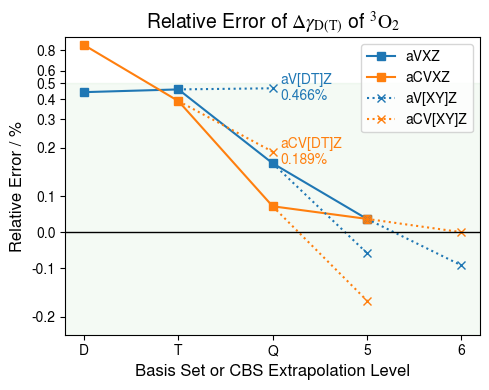

In [9]:
fig, ax = plot_m("O2")
ax.set_title(r"Relative Error of $\Delta \gamma_\mathrm{D(T)}$ of ${}^3 \mathrm{O}_2$", fontsize=14)
v1 = df_aniso_diff.loc[("aug-cc-pV[DT]Z", "O2"), "CorrD(T)"]
v2 = df_aniso_diff.loc[("aug-cc-pCV[DT]Z", "O2"), "CorrD(T)"]
ax.text(4.08, v1, "aV[DT]Z\n{:.3f}%".format(v1), c="C0", va="center")
ax.text(4.08, v2, "aCV[DT]Z\n{:.3f}%".format(v2), c="C1", va="center")
ax.legend()
fig.tight_layout()
fig.savefig("figures/O2-aniso.pdf", transparent=True)

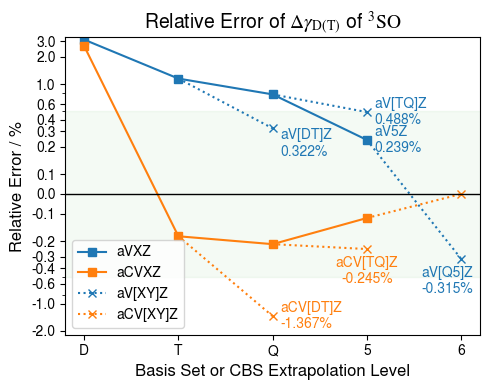

In [10]:
fig, ax = plot_m("SO-trip")
ax.set_title(r"Relative Error of $\Delta \gamma_\mathrm{D(T)}$ of ${}^3 \mathrm{SO}$", fontsize=14)
v1 = df_aniso_diff.loc[("aug-cc-pV[DT]Z", "SO-trip"), "CorrD(T)"]
v2 = df_aniso_diff.loc[("aug-cc-pCV[DT]Z", "SO-trip"), "CorrD(T)"]
v3 = df_aniso_diff.loc[("aug-cc-pV[TQ]Z", "SO-trip"), "CorrD(T)"]
v4 = df_aniso_diff.loc[("aug-cc-pCV[TQ]Z", "SO-trip"), "CorrD(T)"]
v5 = df_aniso_diff.loc[("aug-cc-pV[Q5]Z", "SO-trip"), "CorrD(T)"]
v6 = df_aniso_diff.loc[("aug-cc-pV5Z", "SO-trip"), "CorrD(T)"]
ax.text(4.08, v1, "aV[DT]Z\n{:.3f}%".format(v1), c="C0", va="top")
ax.text(4.08, v2, "aCV[DT]Z\n{:.3f}%".format(v2), c="C1", va="center")
ax.text(5.08, v3, "aV[TQ]Z\n{:.3f}%".format(v3), c="C0", va="center")
ax.text(5.00, v4 - 0.05, "aCV[TQ]Z\n{:.3f}%".format(v4), c="C1", ha="center", va="top")
ax.text(5.85, v5 - 0.06, "aV[Q5]Z\n{:.3f}%".format(v5), c="C0", ha="center", va="top")
ax.text(5.08, v6, "aV5Z\n{:.3f}%".format(v6), c="C0", va="center")
ax.set_ylim(-2.2, 3.3)
ytick_label = [
    '-2.0', '-1.0', '-0.6', '-0.4', '-0.3', '-0.2', '-0.1',
    '0.0',
    '0.1', '0.2', '0.3', '0.4', '0.6', '1.0', '2.0', '3.0']
ax.set_yticks(np.array(ytick_label, dtype=float))
ax.set_yticklabels(ytick_label)
ax.legend()
fig.tight_layout()
fig.savefig("figures/SO-aniso.pdf", transparent=True)

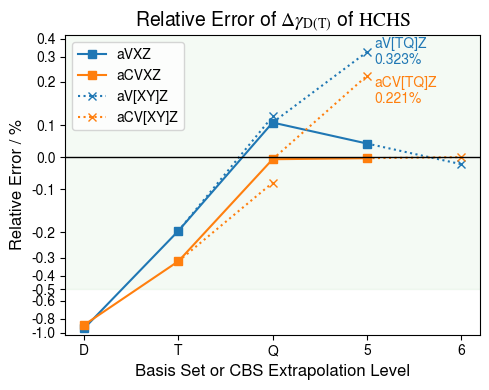

In [11]:
fig, ax = plot_m("HCHS")
ax.set_title(r"Relative Error of $\Delta \gamma_\mathrm{D(T)}$ of $\mathrm{HCHS}$", fontsize=14)
v1 = df_aniso_diff.loc[("aug-cc-pV[TQ]Z", "HCHS"), "CorrD(T)"]
v2 = df_aniso_diff.loc[("aug-cc-pCV[TQ]Z", "HCHS"), "CorrD(T)"]
ax.text(5.08, v1, "aV[TQ]Z\n{:.3f}%".format(v1), c="C0", va="center")
ax.text(5.08, v2, "aCV[TQ]Z\n{:.3f}%".format(v2), c="C1", va="top")
ax.legend()
fig.tight_layout()
fig.savefig("figures/HCHS-aniso.pdf", transparent=True)

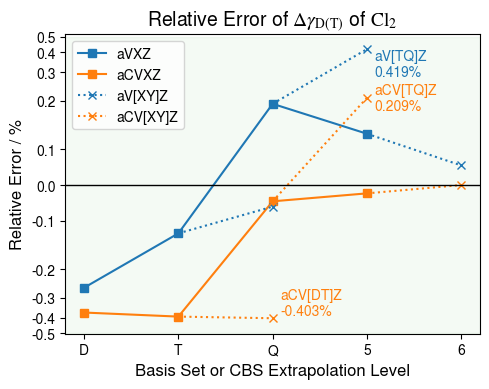

In [12]:
fig, ax = plot_m("Cl2")
ax.set_title(r"Relative Error of $\Delta \gamma_\mathrm{D(T)}$ of $\mathrm{Cl}_2$", fontsize=14)
v1 = df_aniso_diff.loc[("aug-cc-pV[TQ]Z", "Cl2"), "CorrD(T)"]
v2 = df_aniso_diff.loc[("aug-cc-pCV[TQ]Z", "Cl2"), "CorrD(T)"]
v3 = df_aniso_diff.loc[("aug-cc-pCV[DT]Z", "Cl2"), "CorrD(T)"]
ax.text(5.08, v1, "aV[TQ]Z\n{:.3f}%".format(v1), c="C0", va="top")
ax.text(5.08, v2, "aCV[TQ]Z\n{:.3f}%".format(v2), c="C1", va="center")
ax.text(4.08, v3, "aCV[DT]Z\n{:.3f}%".format(v3), c="C1", va="bottom")
ax.legend()
fig.tight_layout()
fig.savefig("figures/Cl2-aniso.pdf", transparent=True)